Dates and times appear everywhere in an analysis context. Businesses want to see if a new advertising campaign has made a significant effect on their sales, so they would look for patterns before and after the campaign. Accelerometers in our phone keep track of our activity through time, so we can analyze how active we are throughout the day.

R doesn't have a built-in data type for dates and times, but it has well established functions that smooth the process of using them. We'll be using [the `lubridate` package](https://lubridate.tidyverse.org/index.html).

We'll refer to **dates** as time on `longer scales`, like years, months and days. The phrase **times** refers to `shorter scale` of time, down to hours, minutes and seconds.

There are two main ways that dates and times can be represented in R. The first way is through strings. Strings can be complicated because dates and times can be written in many different ways. The way a date is written can change depending on the country we live in.

This is why packages like `lubridate` are essential to handling dates and times. The `lubridate` package is a part of the `tidyverse` and is dedicated to handling this data type. There are specific functions to handle different strings and correctly capture the date given a search pattern. This process is called **parsing a date**. We'll look at two examples to lubridate's parsing functions:

`date1 <- "20/04/21"
date2 <- "04-21-20"`

`lubridate` has a series of functions that let us convert both of these strings to the same standard date. Each of them follows the same naming pattern. The first one is in the format "YEAR/MONTH/DAY", so we can use the [`ymd()` function](https://lubridate.tidyverse.org/reference/ymd.html) to do the conversion.

`ymd(date1)
[1] "2020-04-21"`

The second one is in "MONTH/DAY/YEAR" format, so we'd have to switch around the letters: the [myd() function](https://lubridate.tidyverse.org/reference/ymd.html) is more appropriate here.

`mdy(date2)
[1] "2020-04-21"`

**Task**

Convert following string into date format

`date1 <- "01011970" # should be January 1, 1970
date2 <- "2019-03-04" # should be March 4, 2019`

**Answer**

`library(lubridate)`

`date_standardized1 <- mdy(date1)
date_standardized2 <- ymd(date2)`

`lubridate` extends these functions to account for time as well. For the most part, we only deal with hours, minutes and seconds when dealing with time, so we'll focus on these aspects.

`date1 <- "20/04/21 13:30:00"
date2 <- "04-21-2020 01-30 PM"`

These two dates are similar to what we saw above, but now they incorporate time information.

`lubridate` extends these functions to handle time by using `h` to denote hour, `m` to denote minutes and `s` to denote seconds.

`ymd_hms(date1)
[1] "2020-04-21 13:30:00 UTC"`

`lubridate` distinguishes between the dates and times with an underscore. The output of the `ymd_hms()` function is similar to the `ymd()` function, but it has added the extra information on time. The three letter acronym "UTC" at the end stands for **Coordinated Universal Time**, and it represents the time zone for the date and time. If no timezone is specified in the date/time parsing functions, lubridate assumes that the timezone is UTC.

If we wanted to change the timezone, we would need to specify it in the `tz` input of the parsing functions. Let's say that the date and time for `date2` actually comes from New York, so we can adjust accordingly.

`mdy_hm(date2, tz = "America/New_York")
[1] "2020-04-21 13:30:00 EDT"`

Notice here that the function lacks the `s` for second since `date2` has no information on seconds. The family of date/time parsing functions is large and can account for a wide array of situations.

If we are unsure about our own timezone, we can use the `Sys.timezone()` function into our R console, and it returns which one our system uses.

**Task**

Convert following string into date format

`datetime1 <- "01-01-1970-00-00-00" # should be January 1, 1970 at midnight
datetime2 <- "2019-03-14 1:59 AM" # should be March 14, 2019, 1:59 AM`

Answer

`library(lubridate)`

`datetime_standardized1 <- mdy_hms(datetime1)
datetime_standardized2 <- ymd_hm(datetime2)`

While most of the time, we'll see dates and times formatted in terms of strings, there is another important representation that needs to be mentioned. It is actually possible to represent dates and times as a number, and this representation is called **Unix time**. Unix time was created to make dates and times more computer-friendly.

To describe time numerically, Unix time describes the amount of seconds that have passed since January 1st, 1970 at midnight in UTC. The date January 1st, 1970 is usually what's used as an origin, or **Unix epoch**, but others can be specified. In any case, Unix dates and times are always in reference to a starting date.

If we want to know what the Unix time is right now, we can write out the code:

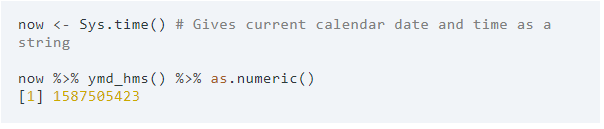

The [`Sys.timezone()` function](https://stat.ethz.ch/R-manual/R-devel/library/base/html/timezones.html) outputs the current time as a string, but this needs some formatting. In order to see a Unix representation of a date, we just need to convert the date/time string into an actual date via the `ymd_hms()` function or one of its relatives. Underneath the hood, `lubridate` knows to handle dates and times in terms of Unix time and shows them as human-readable strings. From there, we can take the output of [`ymd_hms()` function](https://lubridate.tidyverse.org/reference/ymd_hms.html) and convert it back into a number through the [`as.numeric()` function](https://stat.ethz.ch/R-manual/R-devel/library/base/html/numeric.html). At the running of the above code, more than 1.5 billion seconds have passed since midnight January 1, 1970.

String and Unix representations are the main ways we will encounter dates and times. With `lubridate`, we get the benefits of both representations, getting the readability of strings and the calculation-readiness of numbers. 

When working with dates and times, we'll often only need a single part of it depending on the analysis. Sometimes, we may only want the year of a date or maybe the hour. Once we've taken dates and converted them into a date object with `lubridate`, we can use other functions to extract the components we need.

If we wanted to extract the year from the `date` variable, we could use the [`year()` function](https://lubridate.tidyverse.org/reference/year.html).

`date <- ymd("2020-04-21")`

`year(date)
[1] 2020`

Similiarly, there is the [`month()` function](https://lubridate.tidyverse.org/reference/month.html) and the [`day()` function](https://lubridate.tidyverse.org/reference/day.html), `hour()`, `minute()`, `second()` and days of the week `wday()` function 

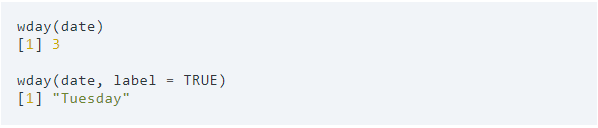

Other types of analyses need to know the day of the year. For example, February 1st would be considered the 32nd day of the year. To get the day of the year for a particular date, we can use the `yday()` function.

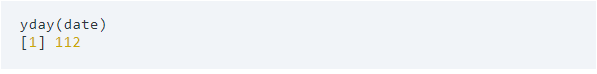

One of the biggest benefts to working with Unix time is that it makes calculating spans of time easier. Using `lubridate`, we can make calculations like the following:

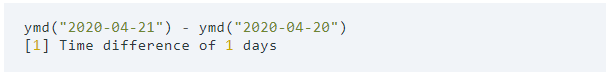

Underneath the hood, R uses the Unix representations of both of these dates and performs the numerical calculation. From the Unix time difference, R calculates how many days worth of seconds it is and returns this to the user. The end result is a smooth process that allows a user to "subtract" dates from each other and get a span of time.

Although the sentence `Time difference of 1 days` was shown on the console, the actual calculation returns a number. If we were to store the calculation in a variable, we would see that it just contains a single `1`.

The sign of this number is important. Since it is positive, we would interpret it as moving forward in time. This makes sense since April 21 must come after April 20. If we were to flip these two dates, then we would get a negative number, representing moving backward in time. 

These calculations work even for more fine-grained calculations involving hours, minutes and seconds, as shown below:

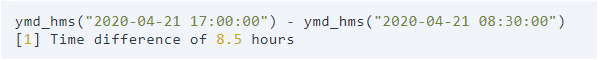

**Task**
* Store the current date and time into a variable named `now`. 

    - `Sys.time()` outputs a string, so we will need to correctly convert it into a date/time using functions from `lubridate`
    
* How much time has passed since March 1st, 2015 to the time stored in now? 

**Answer**

`library(lubridate)
now <- Sys.time() %>% as_datetime
days_since_founding <- now - ymd_hms("2015-03-01 00:00:00")`

There are other cases where we have a start date, and we want to know what the end date is after a given amount of time. This type of calculation is much more nuanced since we have to account for possible carryover between months and the possibility of daylight savings. To account for these complexities, `lubridate` has created several functions that allow us to account for these extra details. These functions create two different types of time spans that we can add to dates: Durations and Periods.

Durations record a time span in the exact amount of seconds that make it up. We can use the [`duration()` function](https://lubridate.tidyverse.org/reference/duration.html) to create a Duration:

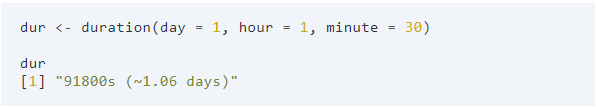

The largest time scale available to make a duration is the `week`. After we create a Duration object, we can add it to different start dates to see what the corresponding end date would be.

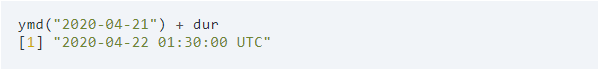

Durations are useful when we want to be more precise with our time calculations. With durations, each second is treated the same. However, there are times where this isn't the case, like with month carryover, leap years or daylight savings. Durations **do not** correctly account for these factors, so we would need to look at Period objects for this purpose.

We can create Periods in a similar way to Durations with the [`period()` function](https://lubridate.tidyverse.org/reference/period.html).

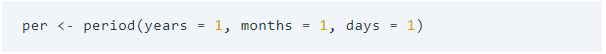

Unlike Durations, we can specify longer time spans with Periods since they are able to account for different time conventions. In terms of calculation though, Periods and Durations are indistinguishable.

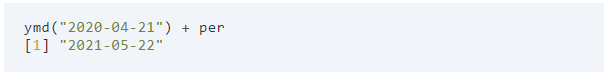

As a rule of thumb, if we don't need to worry about things like daylight savings, use Durations. If we do, use Periods.

Most analyses you'll do with dates and times will happen in only one time zone, which helps standardize the time in the dataset. However, we may not be so lucky at other times if our analysis contains rows from multiple timezones, as would be the case if our data comes from multiple states or countries.

In these cases, we would need to convert time zone. As with the other operations we've learned  `lubridate` offers a few functions that smooth the process of this conversion. We'll start with an example date and time:

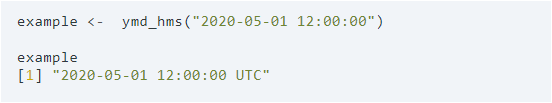

We may recall that dates and times default to the UTC timezone if we do not specify a timezone in functions like `ymd_hms()` function. In order to convert this time into another time zone, we can use the [`with_tz()` function](https://lubridate.tidyverse.org/reference/with_tz.html). For example, if we wanted to convert the example time into Pacific Daylight Time (PDT), we would need to use the timezone `"America/Los_Angeles"`.

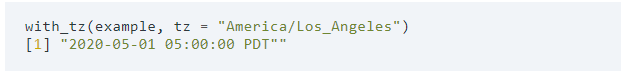

This answer lines up with our intutition since PDT is actually seven hours behind UTC. In order to use the [`with_tz()` function](https://lubridate.tidyverse.org/reference/with_tz.html) correctly, we will need to know precisely what string correponds to the time zone that we want to convert to. To get a detailed list of all the possible timezones that are accepted by the `with_tz()` function, we can use the [`OlsonNames()` function](https://stat.ethz.ch/R-manual/R-devel/library/base/html/timezones.html). The `OlsonNames()` function returns a long character vector of all the possible timezones. We show a partial vector below.

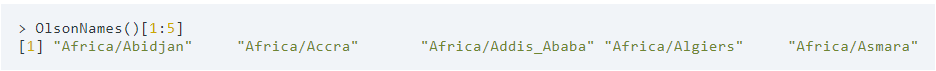

Notice that the `OlsonNames()` function needs to have the empty `()` parentheses in order to access the character vector. The `[]` square brackets access the elements in the returned character vector.